# Task 1

Import the necessary libraries.

In [1]:
import pandas as pd

## 1.1 Get the data and do a basic review

Read in the data-set.

In [2]:
asteroid1 = pd.read_csv('China Aug 2022 Asteroid 1.csv')

Determine the size and shape of the data.

In [3]:
asteroid1.shape

(4966, 19)

Determine the types of each feature in the data-set.

In [4]:
asteroid1.dtypes

ID                 object
Alamosite          object
Chalcophyllite     object
Gypsum             object
Orpiment           object
Junitoite          object
Phoenicochroite    object
Groutite           object
Zykaite            object
Weloganite         object
Diadochite         object
Semseyite          object
Creedite           object
Xieite             object
Eveite             object
Rutile             object
Tyrolite           object
Feroxyhyte         object
Kostovite          object
dtype: object

Here is to display the first 10 rows of data.

In [5]:
asteroid1[0:10]

ID Alamosite Chalcophyllite Gypsum Orpiment Junitoite  \
0  Ast_000001      1893           3812   4945     4139      2689   
1  Ast_000002      3604           4652   2587     2021      4569   
2  Ast_000003      4370           4676   2648     2375      4468   
3  Ast_000004      2767           5068   1547     2958      3945   
4  Ast_000005      2007           4186   3776     3177      3575   
5  Ast_000006      2221           3900   4356     3932      2729   
6  Ast_000007      4621           2176   1933     3065      4278   
7  Ast_000008      4414           4557   2199     1695      4945   
8  Ast_000009      4094           1353   2506     4370      1505   
9  Ast_000010      4336            878   1915     3953      1710   

  Phoenicochroite Groutite Zykaite Weloganite Diadochite Semseyite Creedite  \
0            3768     9569    3164       4259       2396      4239    12622   
1            1844    16390    1598       3981       5562      2426     6278   
2            1037    19471    1495       3981       5267      1924     7317   
3            2363    13061    4045       3327       3581      2042     9063   
4            2242    10044    3059       4721       2719      4707     9740   
5            3261    10878    4177       3884       2334      4324    11999   
6            3895    20477    3665       3349       5578      4934     9408   
7            2137    19657    2724       4202       4819      2150     5282   
8            3854    18376    1705       3807       3074      2786    13314   
9            3542    19345    2117       4224       2899      2783    12075   

  Xieite Eveite Rutile Tyrolite Feroxyhyte Kostovite  
0   2955   5695   3161     3115       3356      3309  
1   4205   3471   1100     2433       3845      1607  
2   3366   2485   1598     2313       3802      1905  
3   5112   2422   4076     4758       4329      2643  
4   4266   3564   1595     2919       1938      4296  
5   3031   5149   3315     3026       2946      3174  
6   5162   2673   1686     2837       4558      3792  
7   3883   2616   2419     2454       2408      1915  
8   2645   4348   2243     3086       2554      3752  
9   2763   4871   2725     3170       3011      3638

## 1.2 Clean and tidy the Data

Through the observation of the data, it can be found that some data is not exactly in numeric format but other symbols. Hence, need to detect and fix these defects.

### 1.2.1 Detect defects in the data

In [6]:
import missingno as msno

First convert the data types from object into numeric.

In [7]:
ast1 = asteroid1.columns.drop('ID')
ast1 = asteroid1[ast1].apply(pd.to_numeric, errors='coerce')

Check the types of each feature in the data-set.

In [8]:
ast1.dtypes

Alamosite          float64
Chalcophyllite     float64
Gypsum             float64
Orpiment           float64
Junitoite          float64
Phoenicochroite    float64
Groutite           float64
Zykaite            float64
Weloganite         float64
Diadochite         float64
Semseyite          float64
Creedite           float64
Xieite             float64
Eveite             float64
Rutile             float64
Tyrolite           float64
Feroxyhyte         float64
Kostovite          float64
dtype: object

Check if there is any missing data (NaN) and display a count of missing data.

In [9]:
print(ast1.isnull().sum().sum())

172


Plot a graphic that visualises missing data.

<AxesSubplot:>

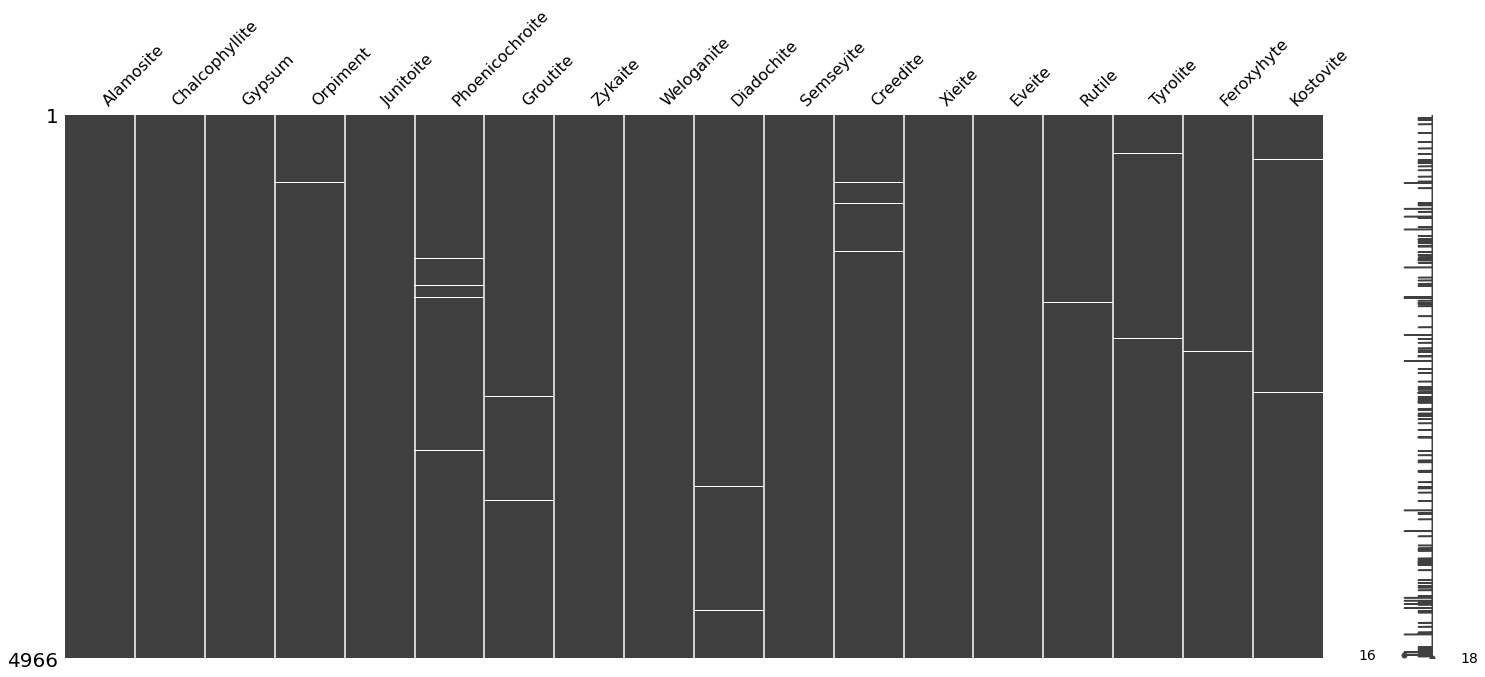

In [10]:
msno.matrix(ast1)

Next draw a bar-chart that counts the number of missing items in each feature.

<AxesSubplot:>

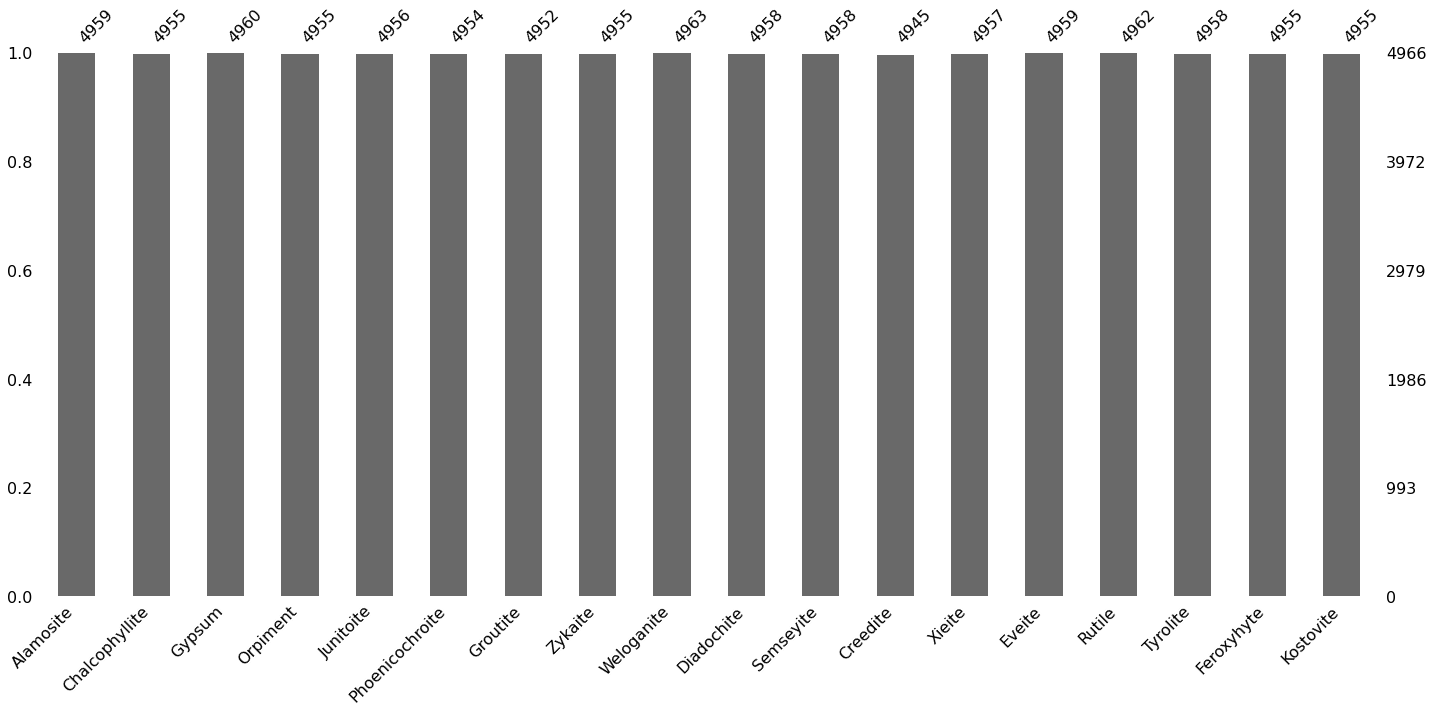

In [11]:
msno.bar(ast1)

### 1.2.2 Repair missing data

In order not to affect the final cluster results, each row that contains a missing value is deleted here. According to the previous review of the data, there are 4966 rows of data with only 172 missing data. So deleting this data won't have a big impact on the results.

In [12]:
ast1.dropna(inplace = True)
ast1

Alamosite  Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  \
0        1893.0          3812.0  4945.0    4139.0     2689.0           3768.0   
1        3604.0          4652.0  2587.0    2021.0     4569.0           1844.0   
2        4370.0          4676.0  2648.0    2375.0     4468.0           1037.0   
3        2767.0          5068.0  1547.0    2958.0     3945.0           2363.0   
4        2007.0          4186.0  3776.0    3177.0     3575.0           2242.0   
...         ...             ...     ...       ...        ...              ...   
4961     3667.0          1609.0  1474.0    4249.0     1874.0           3550.0   
4962     3096.0          4581.0  1941.0    3104.0     3761.0           2718.0   
4963     4136.0          1868.0  1499.0    4403.0     2121.0           3932.0   
4964     4543.0          1783.0  1996.0    3374.0     4591.0           3792.0   
4965     4337.0          4424.0  3218.0    2146.0     4686.0           1619.0   

      Groutite  Zykaite  Weloganite  Diadochite  Semseyite  Creedite  Xieite  \
0       9569.0   3164.0      4259.0      2396.0     4239.0   12622.0  2955.0   
1      16390.0   1598.0      3981.0      5562.0     2426.0    6278.0  4205.0   
2      19471.0   1495.0      3981.0      5267.0     1924.0    7317.0  3366.0   
3      13061.0   4045.0      3327.0      3581.0     2042.0    9063.0  5112.0   
4      10044.0   3059.0      4721.0      2719.0     4707.0    9740.0  4266.0   
...        ...      ...         ...         ...        ...       ...     ...   
4961   16676.0   1869.0      3931.0      2624.0     3212.0   12939.0  2803.0   
4962   14390.0   4000.0      3168.0      3973.0     1981.0    9505.0  4369.0   
4963   18554.0   1777.0      3973.0      2627.0     2774.0   13394.0  2295.0   
4964   20177.0   3744.0      3080.0      4944.0     3562.0   10320.0  3955.0   
4965   19357.0   2345.0      4295.0      4902.0     1869.0    6625.0  3939.0   

      Eveite  Rutile  Tyrolite  Feroxyhyte  Kostovite  
0     5695.0  3161.0    3115.0      3356.0     3309.0  
1     3471.0  1100.0    2433.0      3845.0     1607.0  
2     2485.0  1598.0    2313.0      3802.0     1905.0  
3     2422.0  4076.0    4758.0      4329.0     2643.0  
4     3564.0  1595.0    2919.0      1938.0     4296.0  
...      ...     ...       ...         ...        ...  
4961  4728.0  2622.0    3101.0      2925.0     3822.0  
4962  2606.0  3889.0    4222.0      4742.0     2829.0  
4963  4994.0  2146.0    2888.0      2853.0     3623.0  
4964  2812.0  1942.0    2380.0      4529.0     2951.0  
4965  1858.0  2001.0    2613.0      3861.0     1538.0  

[4813 rows x 18 columns]

### 1.2.3 Find and delete the data that might affect the results

Obtain an overall 'statistical' view of the data.

In [13]:
ast1.describe()

Alamosite  Chalcophyllite        Gypsum      Orpiment     Junitoite  \
count  4.813000e+03    4.813000e+03  4.813000e+03  4.813000e+03  4.813000e+03   
mean   4.096984e+03    6.077865e+03  4.226502e+03  4.598665e+03  4.709457e+03   
std    2.490142e+04    1.284383e+05  3.521480e+04  3.801270e+04  3.212287e+04   
min    1.142000e+03    4.130000e+02  6.990000e+02  5.600000e+01  8.700000e+01   
25%    2.461000e+03    2.400000e+03  1.896000e+03  2.430000e+03  2.943000e+03   
50%    3.891000e+03    4.058000e+03  2.538000e+03  3.162000e+03  3.966000e+03   
75%    4.345000e+03    4.603000e+03  4.185000e+03  3.780000e+03  4.385000e+03   
max    1.000216e+06    8.745635e+06  1.000292e+06  1.000295e+06  1.000236e+06   

       Phoenicochroite      Groutite       Zykaite    Weloganite  \
count     4.813000e+03  4.813000e+03  4.813000e+03  4.813000e+03   
mean      3.643758e+03  1.900212e+04  4.747780e+03  4.729448e+03   
std       2.877111e+04  1.025765e+05  3.801376e+04  3.519123e+04   
min       4.000000e+00  6.560000e+03  6.350000e+02  6.110000e+02   
25%       2.157000e+03  1.184100e+04  2.174000e+03  2.854000e+03   
50%       2.689000e+03  1.757100e+04  3.674000e+03  3.633000e+03   
75%       3.580000e+03  1.938100e+04  4.318000e+03  4.266000e+03   
max       1.000245e+06  4.002886e+06  1.000300e+06  1.000297e+06   

         Diadochite     Semseyite      Creedite        Xieite        Eveite  \
count  4.813000e+03  4.813000e+03  4.813000e+03  4.813000e+03  4.813000e+03   
mean   4.106279e+03  3.644119e+03  1.481888e+04  4.137287e+03  4.754762e+03   
std    2.490566e+04  2.034355e+04  1.175270e+05  2.032944e+04  3.519404e+04   
min    1.094000e+03  1.454000e+03  3.660000e+02  1.520000e+03  1.085000e+03   
25%    2.564000e+03  2.353000e+03  7.493000e+03  2.943000e+03  2.480000e+03   
50%    3.138000e+03  3.132000e+03  9.691000e+03  3.895000e+03  3.102000e+03   
75%    4.498000e+03  4.133000e+03  1.154000e+04  4.394000e+03  4.713000e+03   
max    1.000290e+06  1.000266e+06  3.001084e+06  1.000218e+06  1.000258e+06   

             Rutile      Tyrolite    Feroxyhyte     Kostovite  
count  4.813000e+03  4.813000e+03  4.813000e+03  4.813000e+03  
mean   5.563316e+03  4.323142e+03  4.346114e+03  3.688076e+03  
std    1.139550e+05  3.212992e+04  2.874658e+04  2.490315e+04  
min    5.730000e+02  1.762000e+03  7.600000e+02  5.350000e+02  
25%    1.837000e+03  2.713000e+03  2.724000e+03  2.654000e+03  
50%    2.361000e+03  3.109000e+03  3.439000e+03  3.097000e+03  
75%    3.243000e+03  3.913000e+03  4.488000e+03  3.650000e+03  
max    7.456354e+06  1.000293e+06  1.000291e+06  1.000299e+06

Some data has a big gap with the others, so these data might affect the final results. They are considered to be wrong here, and need to be deleted.

In [14]:
err = ast1[(ast1['Alamosite'] > 10000) | 
           (ast1['Chalcophyllite'] > 10000) |
           (ast1['Gypsum'] > 10000) | 
           (ast1['Orpiment'] > 10000) | 
           (ast1['Junitoite'] > 10000) | 
           (ast1['Phoenicochroite'] > 10000) | 
           (ast1['Groutite'] > 100000) | 
           (ast1['Zykaite'] > 10000) | 
           (ast1['Weloganite'] > 10000) | 
           (ast1['Diadochite'] > 10000) | 
           (ast1['Semseyite'] > 10000) | 
           (ast1['Creedite'] > 100000) | 
           (ast1['Xieite'] > 10000) | 
           (ast1['Eveite'] > 10000) |
           (ast1['Rutile'] > 10000) |
           (ast1['Tyrolite'] > 10000) |
           (ast1['Feroxyhyte'] > 10000) |
           (ast1['Kostovite'] > 10000)].index
ast1.drop(err, inplace=True)
ast1

Alamosite  Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  \
0        1893.0          3812.0  4945.0    4139.0     2689.0           3768.0   
1        3604.0          4652.0  2587.0    2021.0     4569.0           1844.0   
2        4370.0          4676.0  2648.0    2375.0     4468.0           1037.0   
3        2767.0          5068.0  1547.0    2958.0     3945.0           2363.0   
4        2007.0          4186.0  3776.0    3177.0     3575.0           2242.0   
...         ...             ...     ...       ...        ...              ...   
4961     3667.0          1609.0  1474.0    4249.0     1874.0           3550.0   
4962     3096.0          4581.0  1941.0    3104.0     3761.0           2718.0   
4963     4136.0          1868.0  1499.0    4403.0     2121.0           3932.0   
4964     4543.0          1783.0  1996.0    3374.0     4591.0           3792.0   
4965     4337.0          4424.0  3218.0    2146.0     4686.0           1619.0   

      Groutite  Zykaite  Weloganite  Diadochite  Semseyite  Creedite  Xieite  \
0       9569.0   3164.0      4259.0      2396.0     4239.0   12622.0  2955.0   
1      16390.0   1598.0      3981.0      5562.0     2426.0    6278.0  4205.0   
2      19471.0   1495.0      3981.0      5267.0     1924.0    7317.0  3366.0   
3      13061.0   4045.0      3327.0      3581.0     2042.0    9063.0  5112.0   
4      10044.0   3059.0      4721.0      2719.0     4707.0    9740.0  4266.0   
...        ...      ...         ...         ...        ...       ...     ...   
4961   16676.0   1869.0      3931.0      2624.0     3212.0   12939.0  2803.0   
4962   14390.0   4000.0      3168.0      3973.0     1981.0    9505.0  4369.0   
4963   18554.0   1777.0      3973.0      2627.0     2774.0   13394.0  2295.0   
4964   20177.0   3744.0      3080.0      4944.0     3562.0   10320.0  3955.0   
4965   19357.0   2345.0      4295.0      4902.0     1869.0    6625.0  3939.0   

      Eveite  Rutile  Tyrolite  Feroxyhyte  Kostovite  
0     5695.0  3161.0    3115.0      3356.0     3309.0  
1     3471.0  1100.0    2433.0      3845.0     1607.0  
2     2485.0  1598.0    2313.0      3802.0     1905.0  
3     2422.0  4076.0    4758.0      4329.0     2643.0  
4     3564.0  1595.0    2919.0      1938.0     4296.0  
...      ...     ...       ...         ...        ...  
4961  4728.0  2622.0    3101.0      2925.0     3822.0  
4962  2606.0  3889.0    4222.0      4742.0     2829.0  
4963  4994.0  2146.0    2888.0      2853.0     3623.0  
4964  2812.0  1942.0    2380.0      4529.0     2951.0  
4965  1858.0  2001.0    2613.0      3861.0     1538.0  

[4731 rows x 18 columns]

### 1.2.4 Do a final review

Re-count the amount of missing data.

In [15]:
print(ast1.isnull().sum().sum())

0


Visually review data.

In [16]:
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns

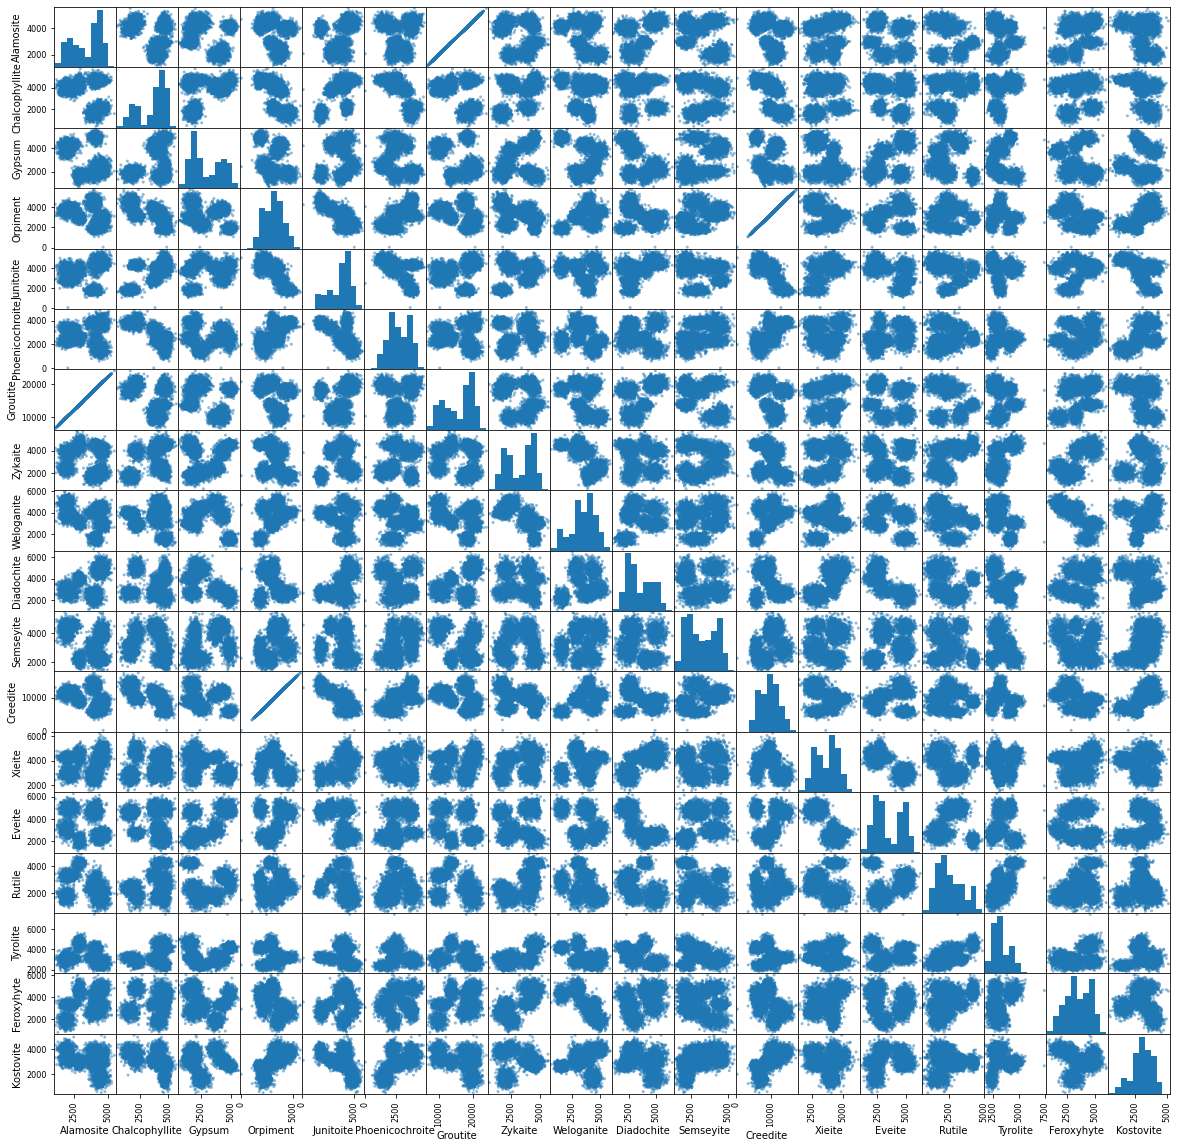

In [17]:
scatter_matrix(ast1,figsize=(20,20));

Correlation matricies.

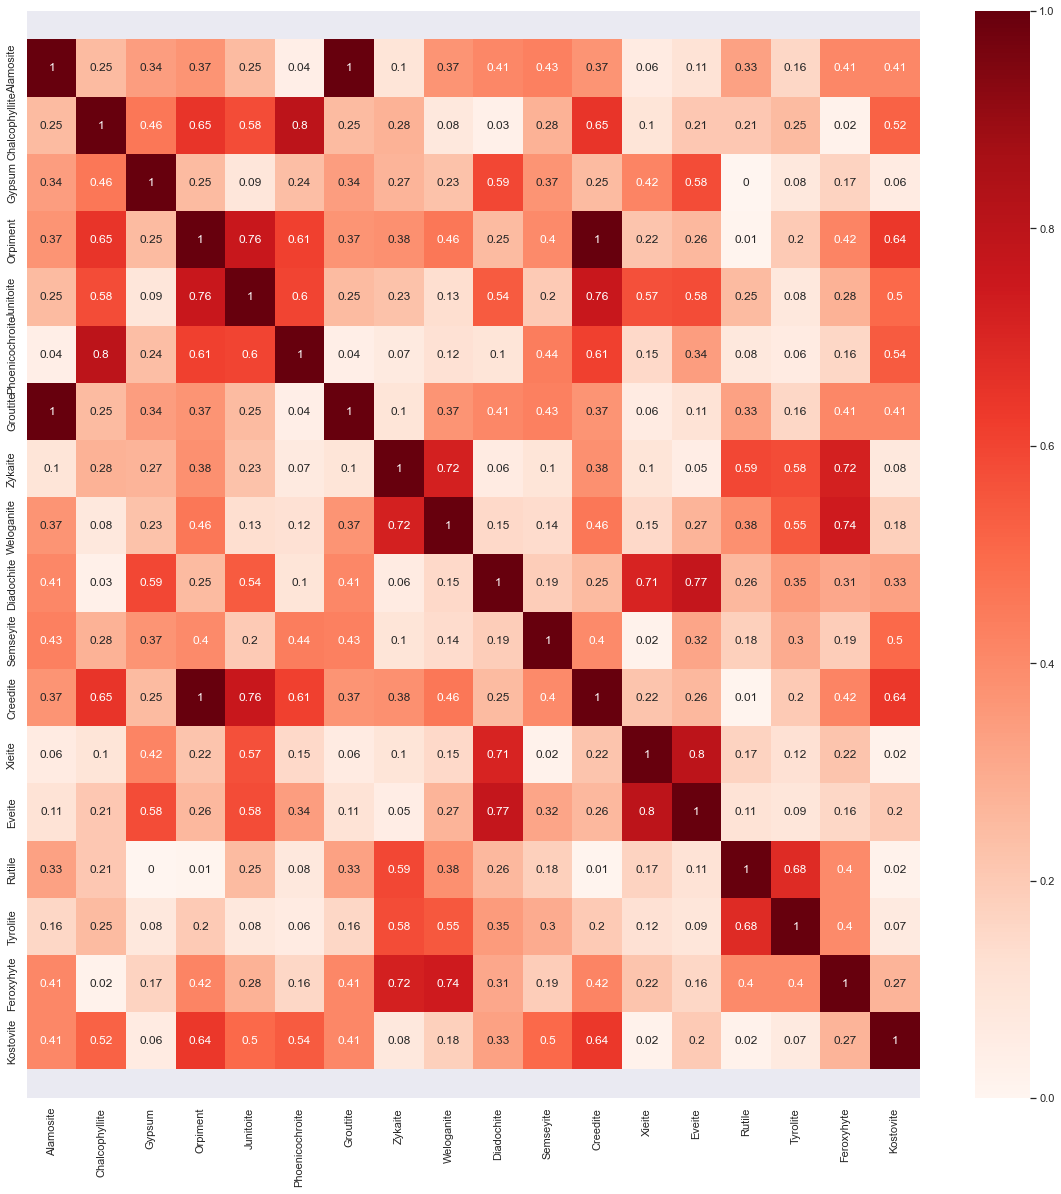

In [18]:
correlation_matrix = np.absolute(ast1.corr().round(2))
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.heatmap(correlation_matrix,annot = True,cmap='Reds')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 1.3 K-means clustering

Use the sklean 'k_means' algorithm to cluster the Asteroid data into clusters.

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

### 1.3.1 Decide the number of clusters

Here are two methods for determining the number of clusters.

**Silhouette Method**

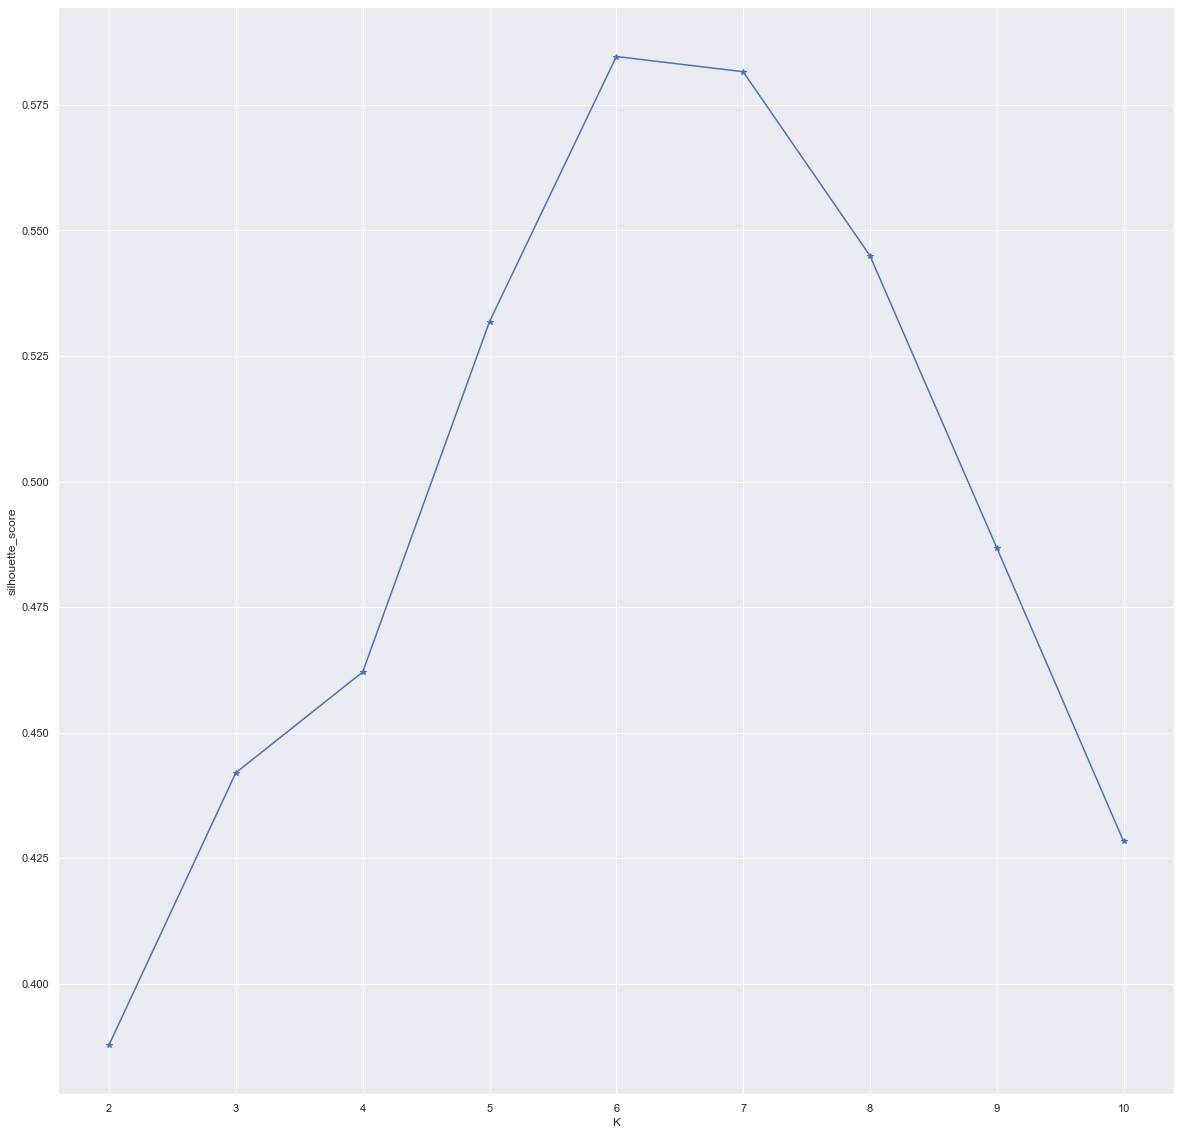

In [20]:
def k_silhouette(X,clusters):
    K = range(2, clusters+1)
    S = []
    for k in K:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        labels = kmeans.labels_
        S.append(metrics.silhouette_score(X,labels,metric='euclidean'))
    
    plt.plot(K,S,'b*-')
    plt.xlabel('K')
    plt.ylabel('silhouette_score')
    plt.show();
    
k_silhouette(ast1,10)

**Elbow Method**

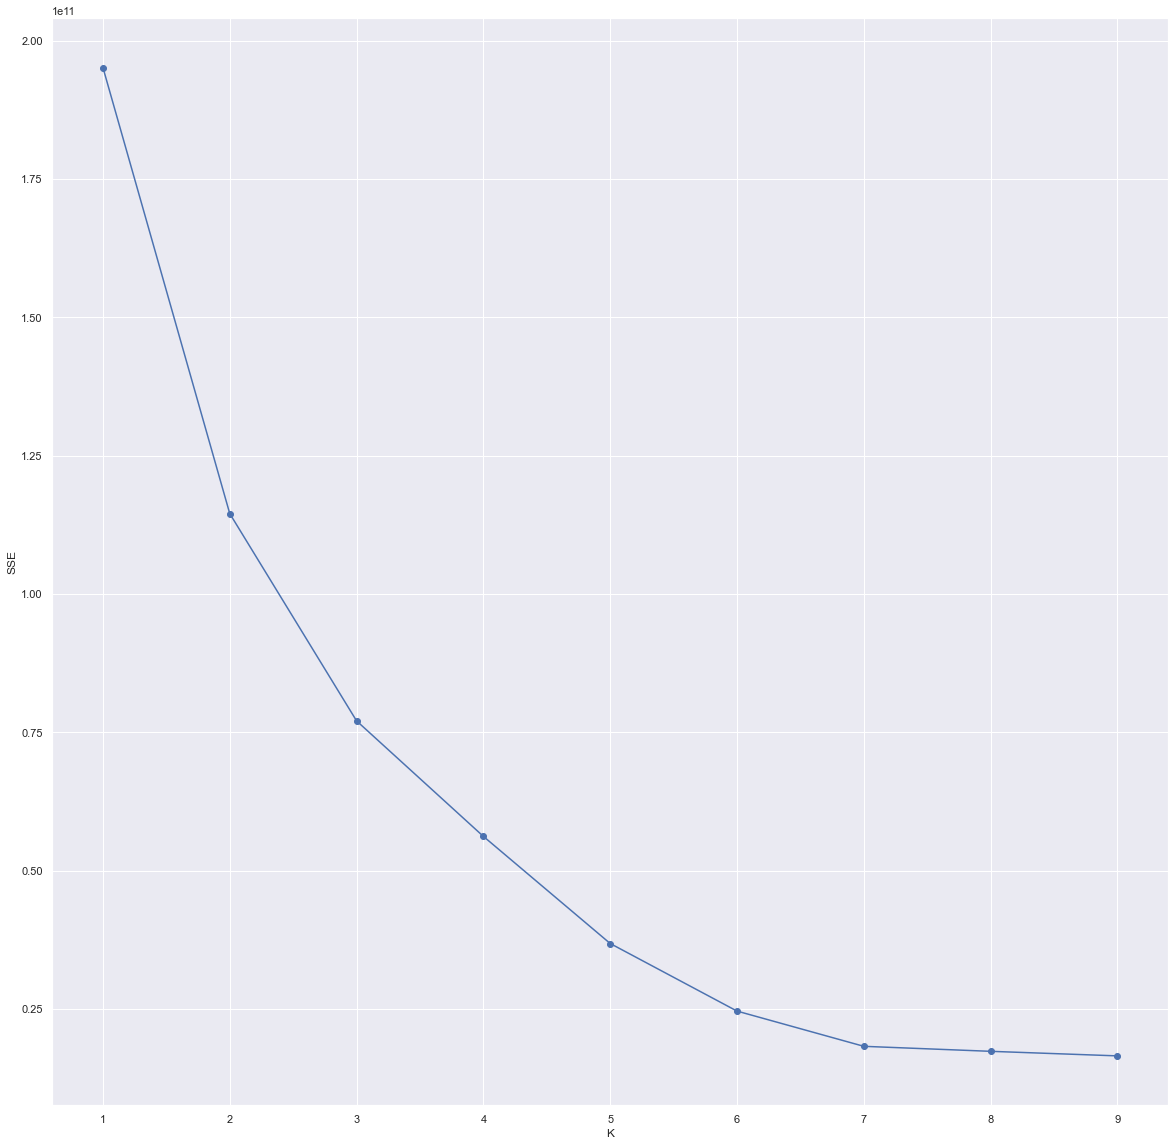

In [21]:
sse = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,)
    kmeans.fit(ast1)
    sse.append(kmeans.inertia_)
x = range(1,10)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x,sse,'o-')
plt.show()

In this case we see good correspondence between the Silhouette and Elbow methods, the number of clusters here is 7.

###  1.3.2 Build the model

First create the object that used to build the model. In this case, the data is grouped into 5 clusters. 

In [22]:
kmeans = KMeans(n_clusters = 7)

Then use that object to identify clusers in the data.

In [23]:
kmeans.fit(ast1)

KMeans(n_clusters=7)

Assign each member of the data-set to one of the clusters.

In [24]:
y_km = kmeans.fit_predict(ast1)

### 1.3.3 Review the Results

In the following charts, the cluster that a particular point belongs to is indicated by a colour.

First plotting Phoenicochroite Vs Creedite

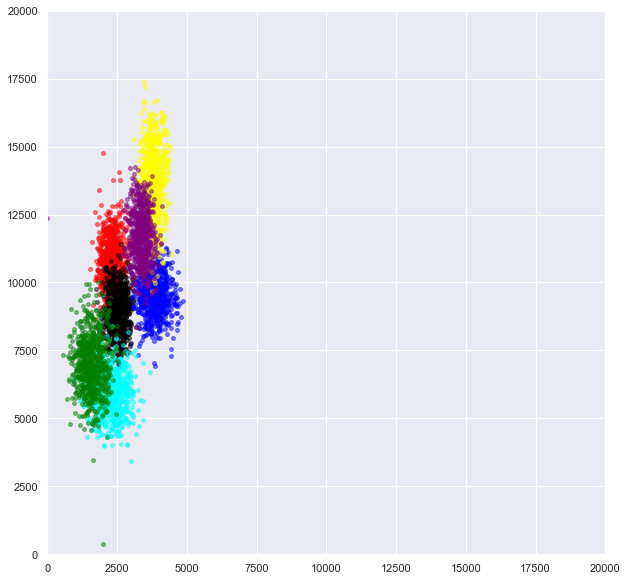

In [25]:
plt.figure(figsize=(10,10))
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.scatter(ast1[y_km==0]['Phoenicochroite'],ast1[y_km==0]['Creedite'],s=15,c='red',alpha=.5)
plt.scatter(ast1[y_km==1]['Phoenicochroite'],ast1[y_km==1]['Creedite'],s=15,c='black',alpha=.5)
plt.scatter(ast1[y_km==2]['Phoenicochroite'],ast1[y_km==2]['Creedite'],s=15,c='blue',alpha=.5)
plt.scatter(ast1[y_km==3]['Phoenicochroite'],ast1[y_km==3]['Creedite'],s=15,c='cyan',alpha=.5)
plt.scatter(ast1[y_km==4]['Phoenicochroite'],ast1[y_km==4]['Creedite'],s=15,c='yellow',alpha=.5)
plt.scatter(ast1[y_km==5]['Phoenicochroite'],ast1[y_km==5]['Creedite'],s=15,c='green',alpha=.5)
plt.scatter(ast1[y_km==6]['Phoenicochroite'],ast1[y_km==6]['Creedite'],s=15,c='purple',alpha=.5)

Take a '3D' view of the data.

In [26]:
from mpl_toolkits.mplot3d import Axes3D

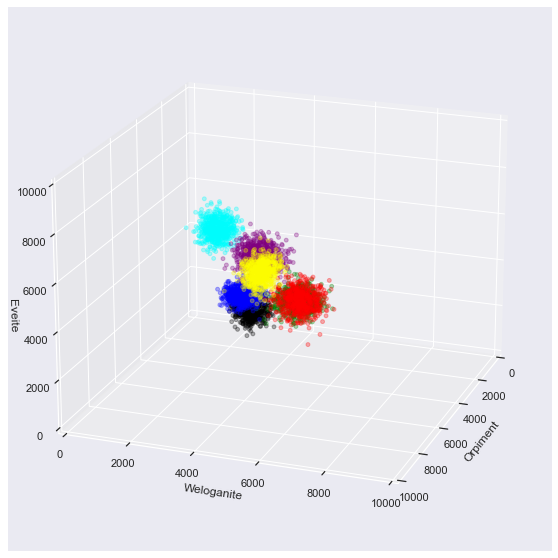

In [27]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(20,20)

ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.set_zlim(0,10000)

ax.set_xlabel('Orpiment')
ax.set_ylabel('Weloganite')
ax.set_zlabel('Eveite')

ax.scatter(ast1[y_km==0]['Orpiment'],ast1[y_km==0]['Weloganite'],
           ast1[y_km==0]['Eveite'],s=15,c='red',alpha=.3)

ax.scatter(ast1[y_km==1]['Orpiment'],ast1[y_km==1]['Weloganite'],
           ast1[y_km==1]['Eveite'],s=15,c='black',alpha=.3)

ax.scatter(ast1[y_km==2]['Orpiment'],ast1[y_km==2]['Weloganite'],
           ast1[y_km==2]['Eveite'],s=15,c='blue',alpha=.3)

ax.scatter(ast1[y_km==3]['Orpiment'],ast1[y_km==3]['Weloganite'],
           ast1[y_km==3]['Eveite'],s=15,c='cyan',alpha=.3)

ax.scatter(ast1[y_km==4]['Orpiment'],ast1[y_km==4]['Weloganite'],
           ast1[y_km==4]['Eveite'],s=15,c='yellow',alpha=.3)

ax.scatter(ast1[y_km==5]['Orpiment'],ast1[y_km==5]['Weloganite'],
           ast1[y_km==5]['Eveite'],s=15,c='green',alpha=.3)

ax.scatter(ast1[y_km==6]['Orpiment'],ast1[y_km==6]['Weloganite'],
           ast1[y_km==6]['Eveite'],s=15,c='purple',alpha=.3)

## 1.4 Conclusion

There are 7 distinct types of asteroid.

The next step is to use Gaussian Mixture Models to work out the typical mixture of minerals for each type of asteroid and the variation in mineral  mixture between asteroid types.

## 1.5 Gaussian Mixture Models

First import the library function.

In [28]:
from sklearn.mixture import GaussianMixture
import numpy as np

Then create the model and fit it.

In [29]:
gmm = GaussianMixture(n_components = 2,covariance_type = "full",tol = 0.001)
gmm1 = gmm.fit(X = ast1[y_km==0])
gmm2 = gmm.fit(X = ast1[y_km==1])
gmm3 = gmm.fit(X = ast1[y_km==2])
gmm4 = gmm.fit(X = ast1[y_km==3])
gmm5 = gmm.fit(X = ast1[y_km==4])
gmm6 = gmm.fit(X = ast1[y_km==5])
gmm7 = gmm.fit(X = ast1[y_km==6])

D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have

Print the modelled mean values (The typical (average) mixture of minerals for each typeof asteroid).

In [30]:
print(gmm1.means_)
print(gmm2.means_)
print(gmm3.means_)
print(gmm4.means_)
print(gmm5.means_)
print(gmm6.means_)
print(gmm7.means_)

[[ 2205.20732841  3733.94013498  4295.61391412  3844.55588437
   2772.74000159  3358.86258779 10819.41852766  3922.31567194
   3681.41500844  2604.12377096  4448.01574409 11733.21111242
   2902.40207557  4932.69677338  3325.27135318  3044.98950511
   3313.32240599  3105.81893494]
 [ 1888.18694184  3673.93252373  4355.54235172  3901.26918211
   2657.91573236  3308.98759827  9551.39352238  3930.92474022
   3689.7913527   2861.63569667  4443.46294649 11903.57554567
   2967.9954085   5005.70421885  3299.63634402  2944.06725816
   3238.44810572  2998.89856686]]
[[ 2205.20732841  3733.94013498  4295.61391412  3844.55588437
   2772.74000159  3358.86258779 10819.41852766  3922.31567194
   3681.41500844  2604.12377096  4448.01574409 11733.21111242
   2902.40207557  4932.69677338  3325.27135318  3044.98950511
   3313.32240599  3105.81893494]
 [ 1888.18694184  3673.93252373  4355.54235172  3901.26918211
   2657.91573236  3308.98759827  9551.39352238  3930.92474022
   3689.7913527   2861.63569667 

Print the Standard Deviations (The variation in mineral  mixture between asteroid types).

In [31]:
print(np.sqrt(gmm1.covariances_))
print(np.sqrt(gmm2.covariances_))
print(np.sqrt(gmm3.covariances_))
print(np.sqrt(gmm4.covariances_))
print(np.sqrt(gmm5.covariances_))
print(np.sqrt(gmm6.covariances_))
print(np.sqrt(gmm7.covariances_))

[[[ 346.98268556           nan           nan           nan   79.68187131
             nan  694.01780001   34.70093407           nan  130.01265777
     68.86096376           nan           nan           nan   63.56910196
             nan           nan           nan]
  [          nan  278.22517319   44.32354209           nan   28.22837479
             nan           nan           nan           nan           nan
             nan           nan           nan   17.73884599   61.38894638
             nan           nan           nan]
  [          nan   44.32354209  279.48981645           nan           nan
             nan           nan           nan   66.99344698           nan
             nan           nan           nan   53.19116018   11.31257994
     70.9264197    57.39180316   56.90363256]
  [          nan           nan           nan  304.11377034   68.61047999
             nan           nan   57.00658497           nan           nan
             nan  526.87603181           nan           nan 

C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:1: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm1.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:2: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm2.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm3.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:4: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm4.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:5: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm5.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:6: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(gmm6.covariances_))
C:\Users\Shile\AppData\Local\Temp\ipykernel_9944\4012009104.py:7: RuntimeWarning: invali

Print the weights.

In [32]:
print(gmm1.weights_)
print(gmm2.weights_)
print(gmm3.weights_)
print(gmm4.weights_)
print(gmm5.weights_)
print(gmm6.weights_)
print(gmm7.weights_)

[0.91561998 0.08438002]
[0.91561998 0.08438002]
[0.91561998 0.08438002]
[0.91561998 0.08438002]
[0.91561998 0.08438002]
[0.91561998 0.08438002]
[0.91561998 0.08438002]


# Task 2

Import the necessary libraries.

In [33]:
import pandas as pd
import missingno as msno

## 2.1 Get the data and do a basic review

Read in the data-set.

In [34]:
asteroid2 = pd.read_csv('China Aug 2022 Asteroid 2 V4.csv')

Determine the size and shape of the data.

In [35]:
asteroid2.shape

(1113, 10)

Determine the types of each feature in the data-set.

In [36]:
asteroid2.dtypes

Chalcophyllite      object
Gypsum              object
Orpiment            object
Junitoite          float64
Phoenicochroite     object
Groutite            object
Zykaite             object
Weloganite          object
Diadochite          object
Category            object
dtype: object

Here is to display the first 10 rows of data.

In [37]:
asteroid2[0:10]

Chalcophyllite Gypsum Orpiment  Junitoite Phoenicochroite Groutite Zykaite  \
0            218    490       25      184.0             316      823     115   
1            731    720      436      183.0              66      778      31   
2            950    964      300      912.0             601      188     114   
3            833    568      255      893.0             638      859     681   
4            938    904      328      992.0             795      602     965   
5             80    455      718      868.0             574      614     163   
6            477    229       61      844.0             586      776     888   
7            573    680      605      694.0             114      352     678   
8            389    717      449      997.0             365      495     259   
9            364    607      423      178.0             900      744     909   

  Weloganite Diadochite Category  
0        325       3711        1  
1        557       4613        0  
2        556       1336        0  
3        749       1836        0  
4        928       3381        0  
5        987       3875        0  
6        571        792        0  
7         59       3272        0  
8         40       5012        1  
9        166       4178        0

## 2.2 Clean and tidy the Data

Through the observation of the data, it can be found that some data is not exactly in numeric format but other symbols. Hence, need to detect and fix these defects.

### 2.2.1 Detect defects in the data

First convert the data types from object into numeric.

In [38]:
cols = ['Chalcophyllite', 'Gypsum', 'Orpiment','Junitoite', 'Phoenicochroite', 'Groutite', 'Zykaite', 'Weloganite', 'Diadochite', 'Category']
asteroid2[cols] = asteroid2[cols].apply(pd.to_numeric, errors='coerce', axis=1)
ast2 = asteroid2

Check the types of each feature in the data-set.

In [39]:
ast2.dtypes

Chalcophyllite     float64
Gypsum             float64
Orpiment           float64
Junitoite          float64
Phoenicochroite    float64
Groutite           float64
Zykaite            float64
Weloganite         float64
Diadochite         float64
Category           float64
dtype: object

Check if there is any missing data (NaN) and display a count of missing data.

In [40]:
print(ast2.isnull().sum().sum())

59


Plot a graphic that visualises missing data.

<AxesSubplot:>

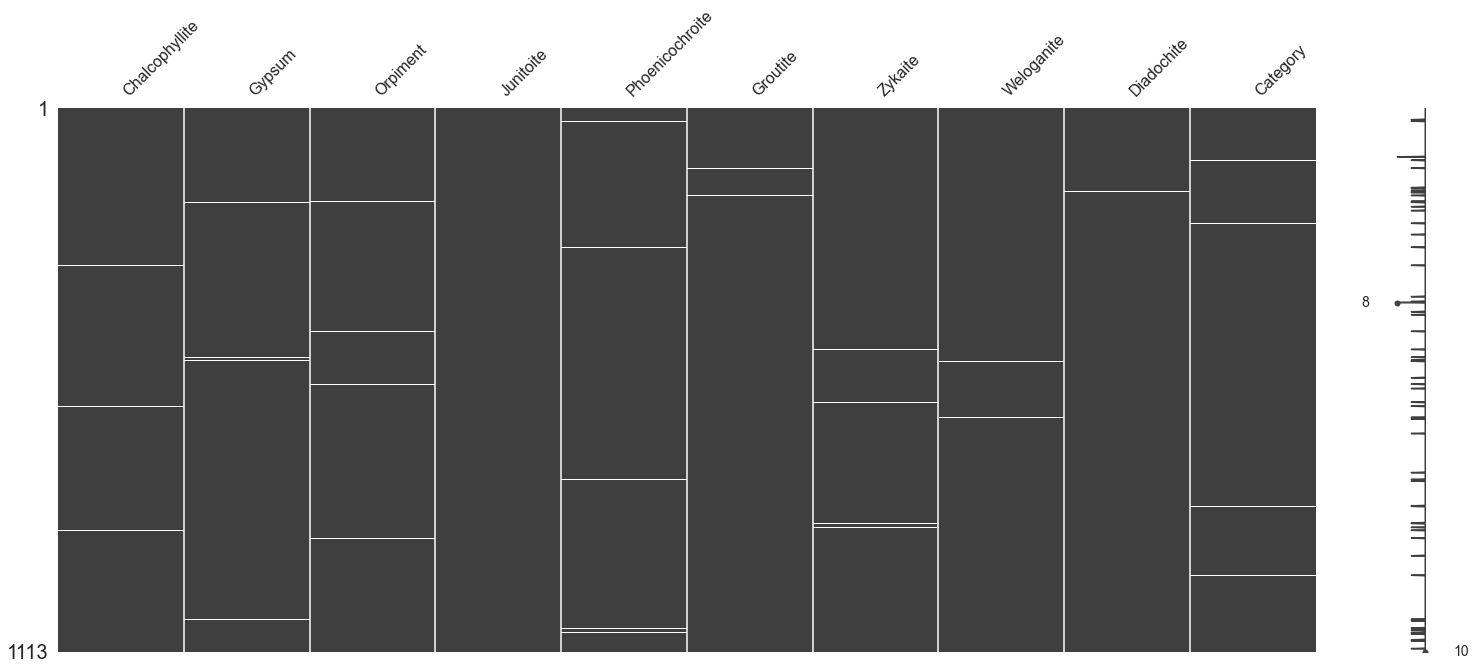

In [41]:
msno.matrix(ast2)

Next draw a bar-chart that counts the number of missing items in each feature.

<AxesSubplot:>

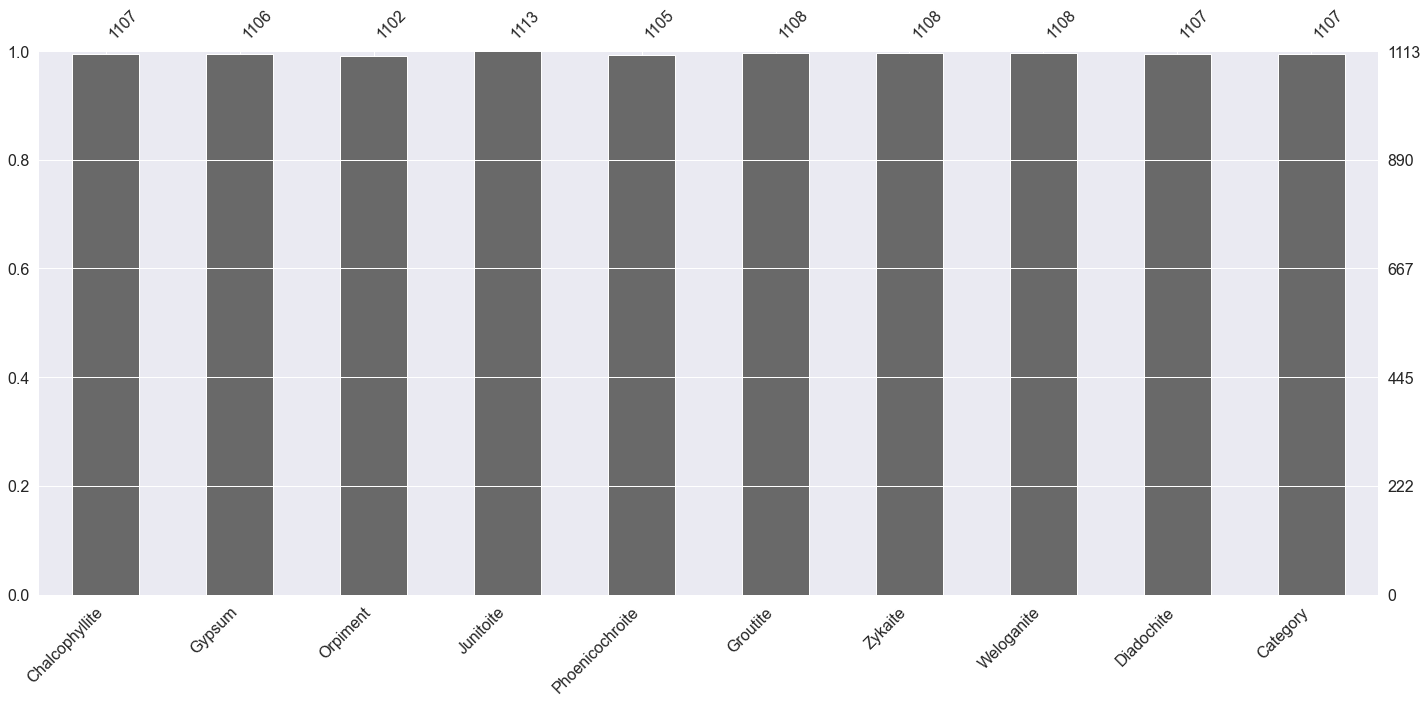

In [42]:
msno.bar(ast2)

### 2.2.2 Repair missing data

In order not to affect the final cluster results, each row that contains a missing value is deleted here. According to the previous review of the data, there are 1113 rows of data with only 59 missing data. So deleting this data won't have a big impact on the results.

In [43]:
ast2.dropna(inplace=True)
ast2

Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  Groutite  \
0              218.0   490.0      25.0      184.0            316.0     823.0   
1              731.0   720.0     436.0      183.0             66.0     778.0   
2              950.0   964.0     300.0      912.0            601.0     188.0   
3              833.0   568.0     255.0      893.0            638.0     859.0   
4              938.0   904.0     328.0      992.0            795.0     602.0   
...              ...     ...       ...        ...              ...       ...   
1108           175.0   161.0     357.0      433.0            138.0     632.0   
1109             5.0   313.0     712.0      118.0            213.0     619.0   
1110           500.0   959.0     810.0      173.0            276.0     137.0   
1111            78.0   284.0     755.0      844.0            785.0     994.0   
1112           609.0   800.0     850.0      675.0            242.0     586.0   

      Zykaite  Weloganite  Diadochite  Category  
0       115.0       325.0      3711.0       1.0  
1        31.0       557.0      4613.0       0.0  
2       114.0       556.0      1336.0       0.0  
3       681.0       749.0      1836.0       0.0  
4       965.0       928.0      3381.0       0.0  
...       ...         ...         ...       ...  
1108    253.0       818.0       656.0       0.0  
1109    398.0       981.0      3191.0       0.0  
1110    919.0       128.0      4115.0       0.0  
1111    395.0       682.0      2921.0       0.0  
1112    504.0       624.0      4401.0       0.0  

[1056 rows x 10 columns]

In [44]:
error = ast2[(ast2['Category'] != 0) & (ast2['Category'] != 1)].index
ast2.drop(error, inplace=True)
ast2

Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  Groutite  \
0              218.0   490.0      25.0      184.0            316.0     823.0   
1              731.0   720.0     436.0      183.0             66.0     778.0   
2              950.0   964.0     300.0      912.0            601.0     188.0   
3              833.0   568.0     255.0      893.0            638.0     859.0   
4              938.0   904.0     328.0      992.0            795.0     602.0   
...              ...     ...       ...        ...              ...       ...   
1108           175.0   161.0     357.0      433.0            138.0     632.0   
1109             5.0   313.0     712.0      118.0            213.0     619.0   
1110           500.0   959.0     810.0      173.0            276.0     137.0   
1111            78.0   284.0     755.0      844.0            785.0     994.0   
1112           609.0   800.0     850.0      675.0            242.0     586.0   

      Zykaite  Weloganite  Diadochite  Category  
0       115.0       325.0      3711.0       1.0  
1        31.0       557.0      4613.0       0.0  
2       114.0       556.0      1336.0       0.0  
3       681.0       749.0      1836.0       0.0  
4       965.0       928.0      3381.0       0.0  
...       ...         ...         ...       ...  
1108    253.0       818.0       656.0       0.0  
1109    398.0       981.0      3191.0       0.0  
1110    919.0       128.0      4115.0       0.0  
1111    395.0       682.0      2921.0       0.0  
1112    504.0       624.0      4401.0       0.0  

[1050 rows x 10 columns]

### 2.2.3 Find and delete the data that might affect the results

Some data has a big gap with the others, so these data might affect the final results. They are considered to be wrong here, and need to delete them.

In [45]:
err = ast2[(ast2['Chalcophyllite'] > 1000) |
           (ast2['Gypsum'] > 1000) | 
           (ast2['Orpiment'] > 1000) | 
           (ast2['Junitoite'] > 1000) | 
           (ast2['Phoenicochroite'] > 1000) | 
           (ast2['Groutite'] > 1000) | 
           (ast2['Zykaite'] > 1000) | 
           (ast2['Weloganite'] > 1000) | 
           (ast2['Diadochite'] > 10000)].index
ast2.drop(err, inplace=True)
ast2

Chalcophyllite  Gypsum  Orpiment  Junitoite  Phoenicochroite  Groutite  \
0              218.0   490.0      25.0      184.0            316.0     823.0   
1              731.0   720.0     436.0      183.0             66.0     778.0   
2              950.0   964.0     300.0      912.0            601.0     188.0   
3              833.0   568.0     255.0      893.0            638.0     859.0   
4              938.0   904.0     328.0      992.0            795.0     602.0   
...              ...     ...       ...        ...              ...       ...   
1108           175.0   161.0     357.0      433.0            138.0     632.0   
1109             5.0   313.0     712.0      118.0            213.0     619.0   
1110           500.0   959.0     810.0      173.0            276.0     137.0   
1111            78.0   284.0     755.0      844.0            785.0     994.0   
1112           609.0   800.0     850.0      675.0            242.0     586.0   

      Zykaite  Weloganite  Diadochite  Category  
0       115.0       325.0      3711.0       1.0  
1        31.0       557.0      4613.0       0.0  
2       114.0       556.0      1336.0       0.0  
3       681.0       749.0      1836.0       0.0  
4       965.0       928.0      3381.0       0.0  
...       ...         ...         ...       ...  
1108    253.0       818.0       656.0       0.0  
1109    398.0       981.0      3191.0       0.0  
1110    919.0       128.0      4115.0       0.0  
1111    395.0       682.0      2921.0       0.0  
1112    504.0       624.0      4401.0       0.0  

[1013 rows x 10 columns]

### 2.2.3 Do a final review

Re-count the amount of missing data.

In [46]:
print(ast2.isnull().sum().sum())

0


In this data-set the label is the 'Category' feature. This contains '0' if the asteroid is mechanically stable and '1' if the asteroid is not mechanically stable.

In [47]:
import seaborn as sns

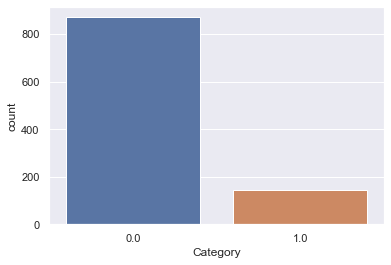

In [48]:
sns.countplot(x = "Category",data = ast2);

Obtain an overall 'statistical' view of the data.

In [49]:
ast2.describe()

Chalcophyllite       Gypsum     Orpiment    Junitoite  Phoenicochroite  \
count     1013.000000  1013.000000  1013.000000  1013.000000      1013.000000   
mean       515.218164   489.937808   502.617966   501.734452       499.960513   
std        285.600067   285.222635   285.797721   293.792857       288.333200   
min          0.000000     0.000000     0.000000     0.000000         1.000000   
25%        274.000000   244.000000   260.000000   257.000000       266.000000   
50%        523.000000   495.000000   500.000000   488.000000       496.000000   
75%        766.000000   732.000000   743.000000   754.000000       752.000000   
max       1000.000000   999.000000  1000.000000  1000.000000       998.000000   

          Groutite      Zykaite   Weloganite   Diadochite     Category  
count  1013.000000  1013.000000  1013.000000  1013.000000  1013.000000  
mean    500.644620   501.488648   504.517275  3002.484699     0.140178  
std     282.967707   287.135769   288.057751  1772.219219     0.347343  
min       0.000000     1.000000     0.000000     7.000000     0.000000  
25%     257.000000   252.000000   253.000000  1436.000000     0.000000  
50%     508.000000   510.000000   505.000000  2991.000000     0.000000  
75%     738.000000   743.000000   754.000000  4618.000000     0.000000  
max     999.000000   999.000000   998.000000  5985.000000     1.000000

Visually review data.

In [50]:
from pandas.plotting import scatter_matrix
import numpy as np

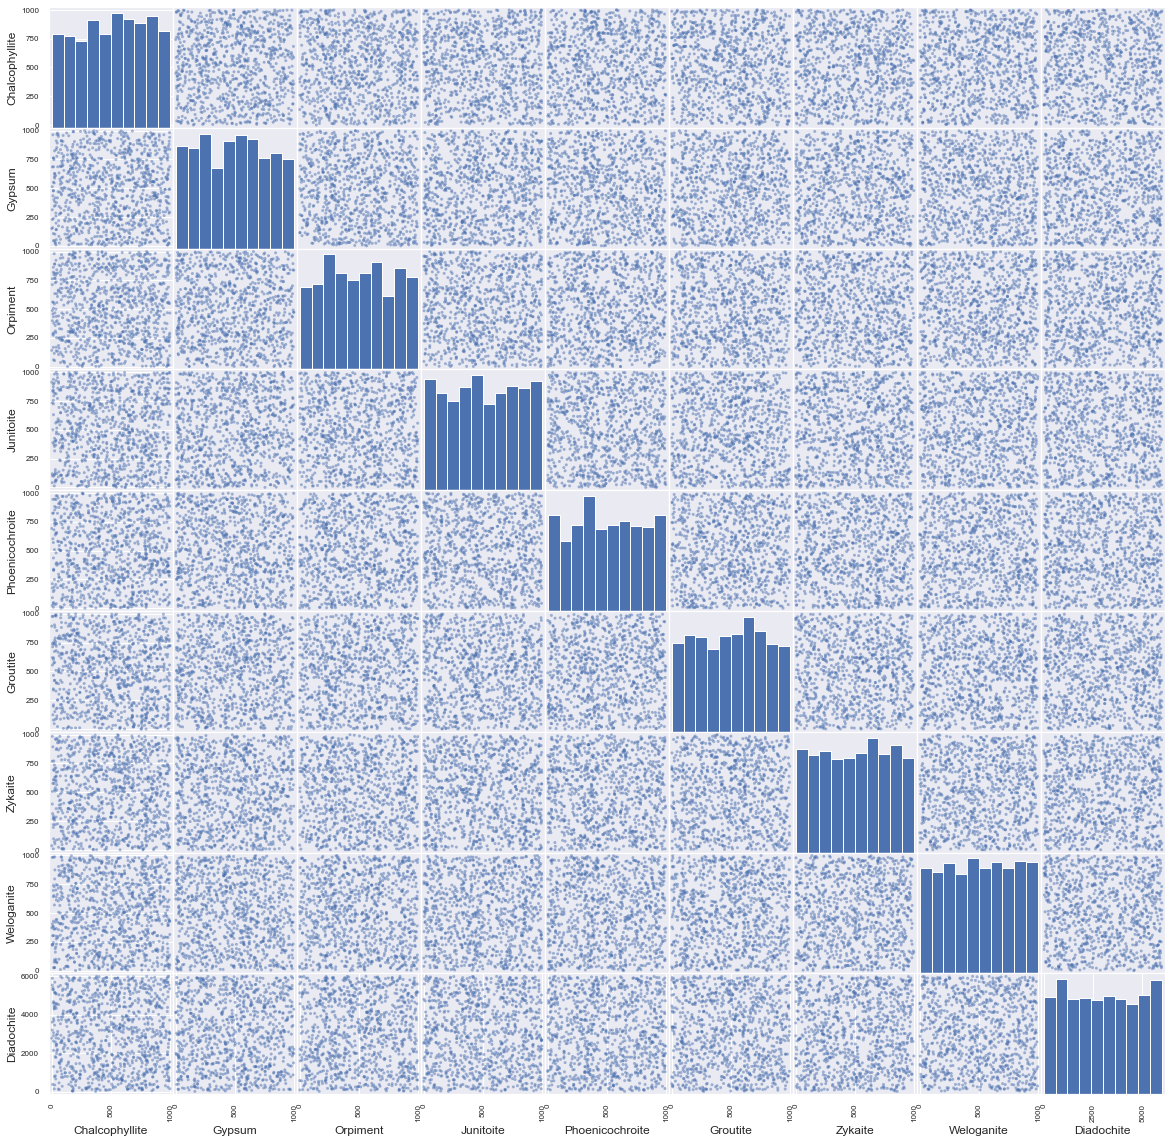

In [51]:
scatter_matrix(ast2[['Chalcophyllite', 'Gypsum', 'Orpiment','Junitoite', 'Phoenicochroite', 'Groutite', 'Zykaite', 'Weloganite', 'Diadochite']],figsize=(20,20));

Correlation matricies.

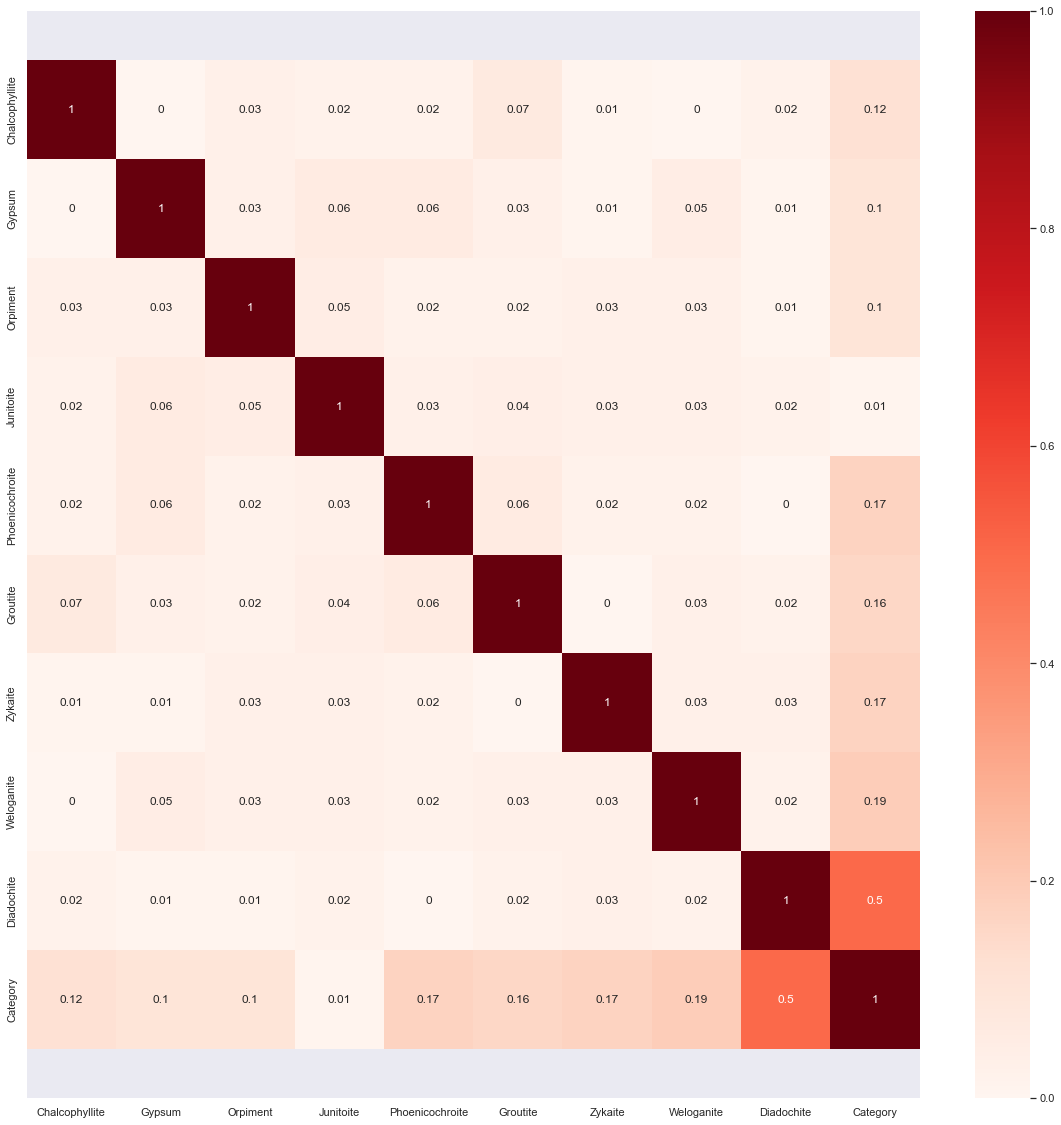

In [52]:
correlation_matrix = np.absolute(ast2.corr().round(2))
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.heatmap(correlation_matrix,annot = True,cmap='Reds')
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## 2.3 Technique 1: Logistic Regression

The first model created is a basic 'Logistic Regression'.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

The data is split into two parts. 'X' represents the known 'inputs' to the model. 'Y' represents the 'label' or known (expected) output from the model.

In [54]:
X = ast2.loc[:,'Chalcophyllite':'Diadochite']
Y = ast2['Category']

Use this function to split the data into two parts in the ratio 80%:20%.

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

Create an instance of the specific modelling algorithm。

In [56]:
logModel = LogisticRegression(solver='liblinear')

Then put the data into the 'machine' to build the model.

In [57]:
logModel = logModel.fit(X_train,y_train)

Then generate a set of predictions based on the test data.

In [58]:
predictions=logModel.predict(X_test)
predictions

array([1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Get the 'score' for the model.

In [59]:
print(logModel.score(X_test,y_test))

0.9605911330049262


## 2.4 Technique 2: Decision Trees

The second model created is a basic 'Decision Tree' using the sklearn library.

Import the required libraries.

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

Split the data into inputs (X) and label (Y).

In [61]:
X = ast2.loc[:,'Chalcophyllite':'Diadochite']
Y = ast2['Category']

Create the model object.

In [62]:
model = DecisionTreeClassifier()

Fit the data using the model.

In [63]:
model.fit(X,Y)

DecisionTreeClassifier()

Review the model as a graphic.

In [64]:
export_graphviz(model,out_file = 'stable_tree.dot',
                feature_names = X.columns,
                class_names = ['Not stable','stable'],
                rounded = True,proportion = False,
                precision = 2,filled=True)

The following is a call to a utility that converts '.dot' files to graphic (.png) files. This enables us to look at the tree graphically.

In [65]:
from subprocess import call
import matplotlib.pyplot as plt

In [66]:
call(['dot','-Tpng','stable_tree.dot','-o','stable_tree.png','-Gdpi=600']);

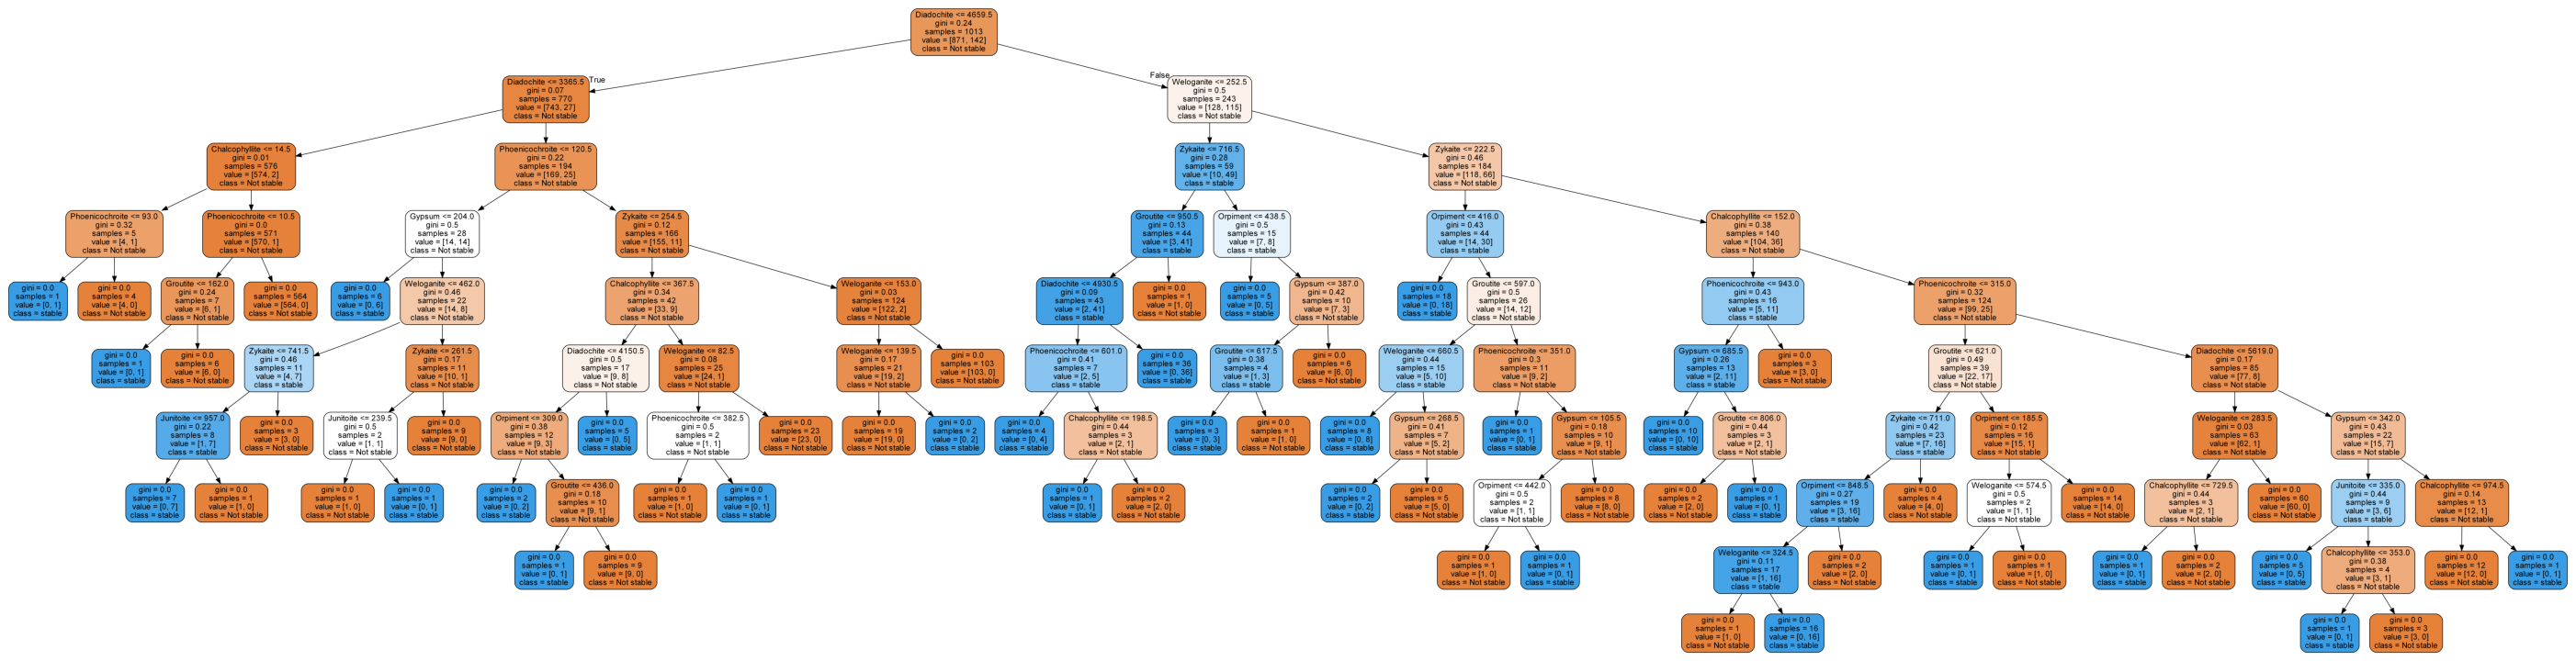

In [67]:
plt.figure(figsize=(50,50))
plt.imshow(plt.imread('stable_tree.png'))
plt.axis('off');
plt.show();

Pruning decision trees.

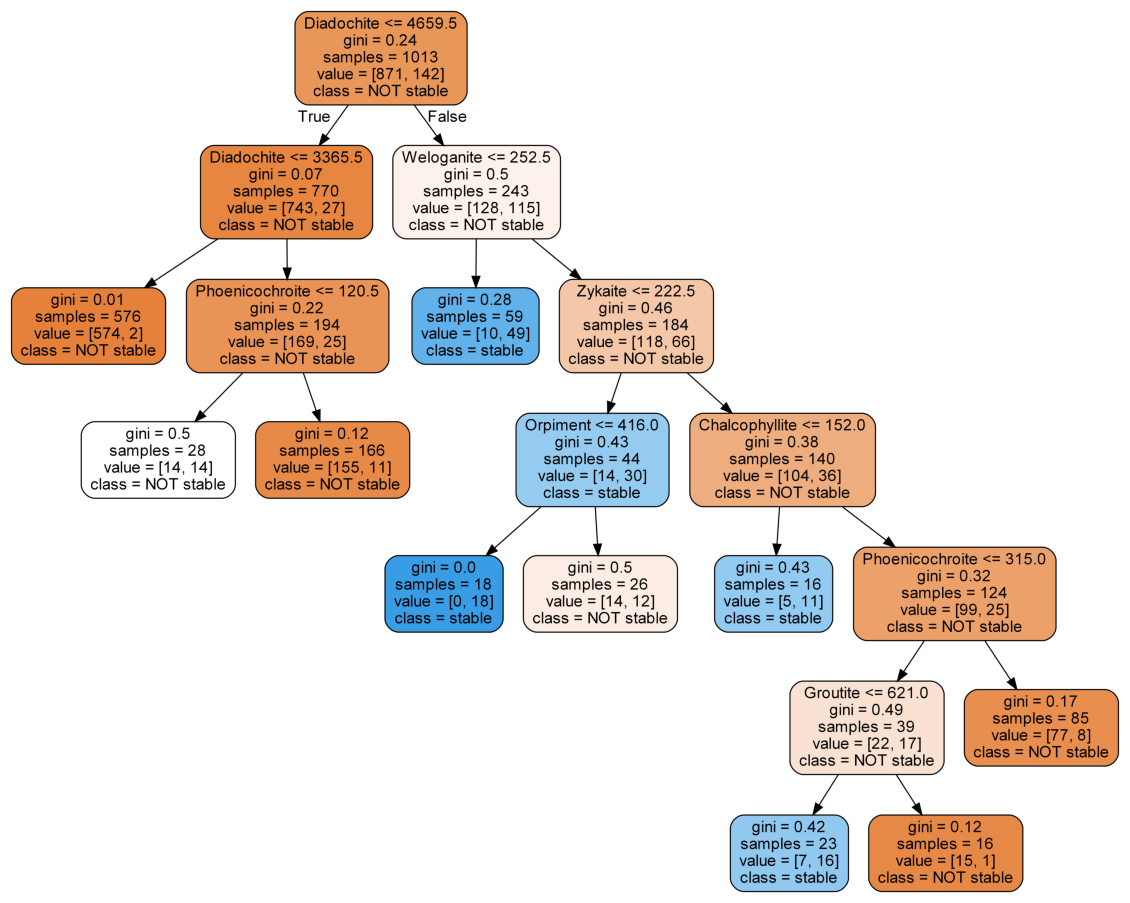

In [68]:
model = DecisionTreeClassifier(ccp_alpha=0.005)
model.fit(X,Y)
export_graphviz(model,out_file = 'stable_tree.dot',
                feature_names = X.columns,
                class_names = ['NOT stable','stable'],
                rounded = True,proportion = False,
                precision = 2,filled=True)
call(['dot','-Tpng','stable_tree.dot','-o','stable_tree.png','-Gdpi=600']);
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('stable_tree.png'))
plt.axis('off');
plt.show();

## 2.5 Technique 3: Random Forest Classifier

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Split the data-set into a training and a test set.

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

### 2.5.1 Random Forrest Classifier Performance

Then build and score the Random Forrest Classifier.

In [71]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.9113300492610837

For a better view of performance, plot the whole Confusion Matrix.

D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


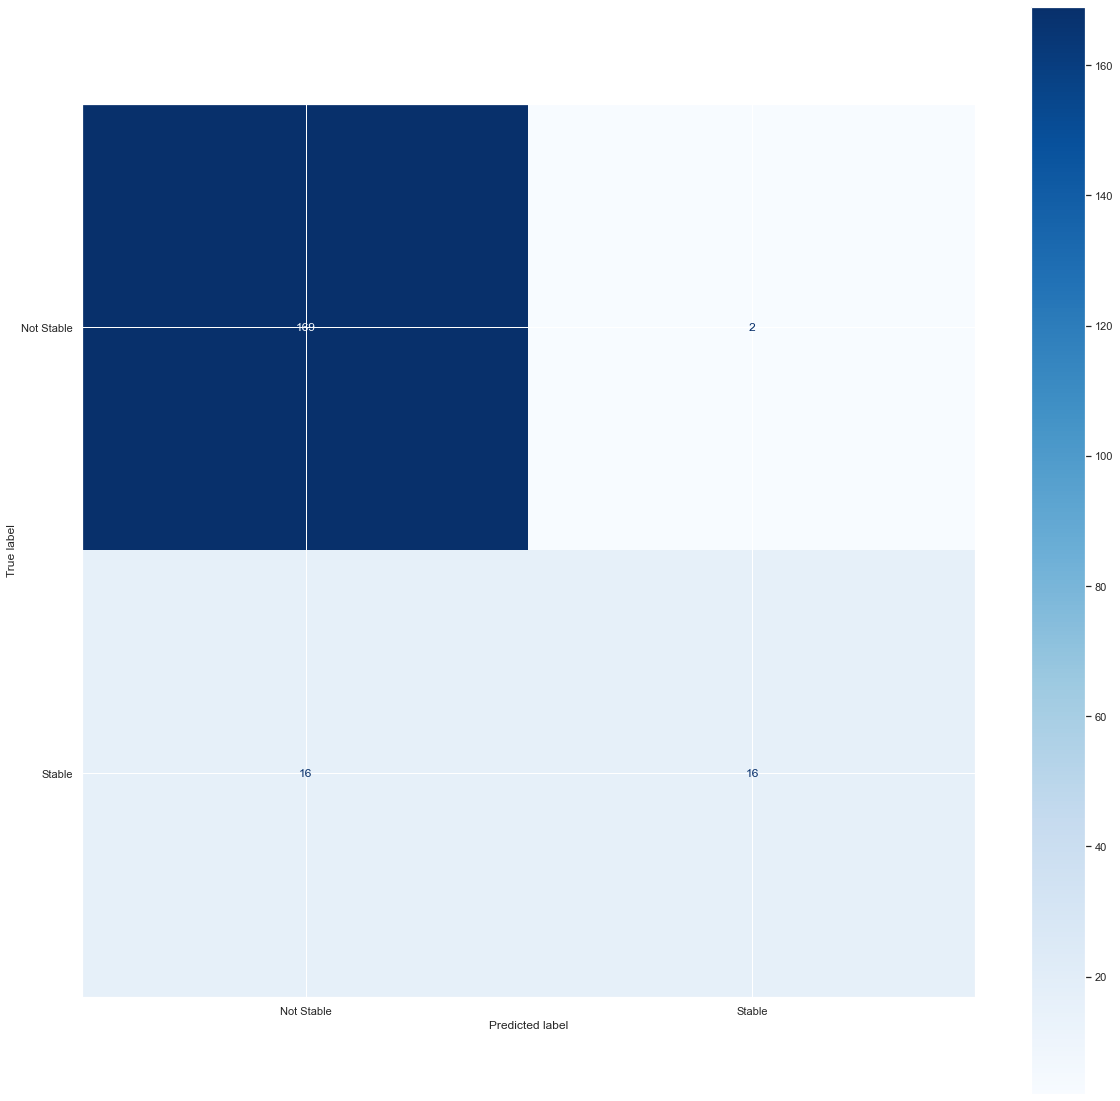

In [72]:
plot_confusion_matrix(rfc,x_test,y_test,display_labels = ['Not Stable','Stable'],cmap = plt.cm.Blues,)
plt.show()

### 2.5.2 Decision Tree performance

Compare that performance with the performance of the basic Decision Tree.

In [73]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.8916256157635468

Plot the confusion matrix.

D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


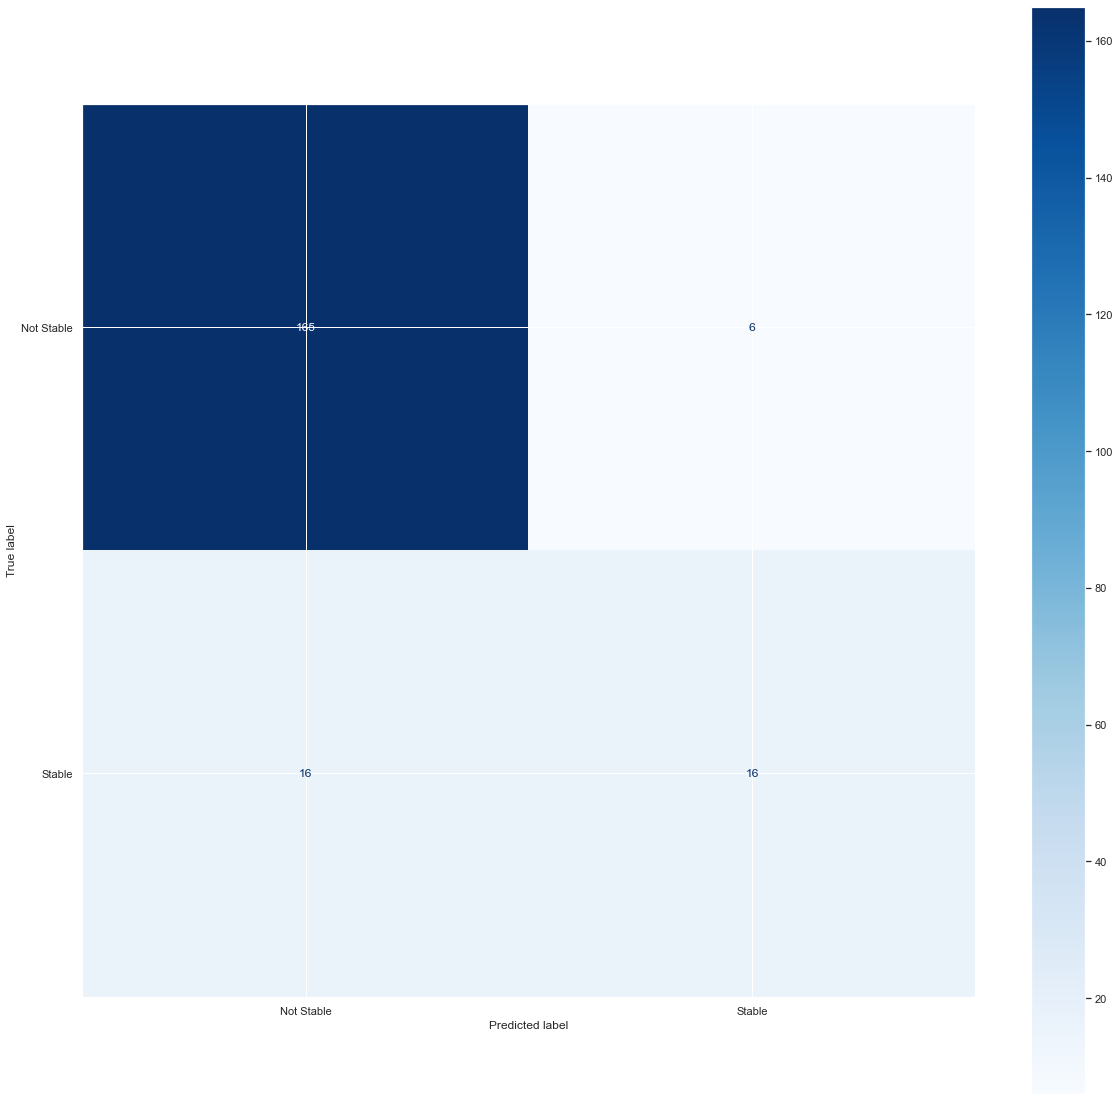

In [74]:
plot_confusion_matrix(dtc,x_test,y_test,display_labels = ['Not Stable','Stable'],cmap=plt.cm.Blues,)
plt.show()

In this instance the performance of the Random Forrest Classifier is rather better than that of the basic Decision Tree.

## 2.6 Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Select the data to use for modelling

In [76]:
X = ast2.loc[:,'Chalcophyllite':'Diadochite']
Y = ast2['Category']

Split data for training and testing

In [77]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

### 2.6.1 Build the linear regression model

In [78]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

### 2.6.2 Test the linear regression model

Compute the scores first for the training data and then for the test data.

In [79]:
y_train_predict = lin_model.predict(X_train)
r2_train = r2_score(Y_train,y_train_predict)
rmse_train = (np.sqrt(mean_squared_error(Y_train,y_train_predict)))

Now the same thing for the test data.

In [80]:
y_test_predict=lin_model.predict(X_test)
r2_test=r2_score(Y_test,y_test_predict)
rmse_test=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))

And compare the results.

In [81]:
print("R2:")
print("  Train = ",r2_train)
print("  Test  = ",r2_test)
print("RMSE:")
print("  Train = ",rmse_train)
print("  Test  = ",rmse_test)

R2:
  Train =  0.4077626618344985
  Test  =  0.33363330145123327
RMSE:
  Train =  0.27244282676859094
  Test  =  0.25873833270766866


The model fits the training data somewhat better than it performs when seeing new data. That is, for the training set the R2 value is closer to 1 (better) and the RMSE is lower (better).

## 2.7 Polynomial Regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures

Generate the features and take a look at the extended set of feature names.

In [83]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
print(poly_features.get_feature_names(["Chalcophyllite","Gypsum","Orpiment","Junitoite","Phoenicochroite","Groutite","Zykaite","Weloganite","Diadochite"]))

['1', 'Chalcophyllite', 'Gypsum', 'Orpiment', 'Junitoite', 'Phoenicochroite', 'Groutite', 'Zykaite', 'Weloganite', 'Diadochite', 'Chalcophyllite^2', 'Chalcophyllite Gypsum', 'Chalcophyllite Orpiment', 'Chalcophyllite Junitoite', 'Chalcophyllite Phoenicochroite', 'Chalcophyllite Groutite', 'Chalcophyllite Zykaite', 'Chalcophyllite Weloganite', 'Chalcophyllite Diadochite', 'Gypsum^2', 'Gypsum Orpiment', 'Gypsum Junitoite', 'Gypsum Phoenicochroite', 'Gypsum Groutite', 'Gypsum Zykaite', 'Gypsum Weloganite', 'Gypsum Diadochite', 'Orpiment^2', 'Orpiment Junitoite', 'Orpiment Phoenicochroite', 'Orpiment Groutite', 'Orpiment Zykaite', 'Orpiment Weloganite', 'Orpiment Diadochite', 'Junitoite^2', 'Junitoite Phoenicochroite', 'Junitoite Groutite', 'Junitoite Zykaite', 'Junitoite Weloganite', 'Junitoite Diadochite', 'Phoenicochroite^2', 'Phoenicochroite Groutite', 'Phoenicochroite Zykaite', 'Phoenicochroite Weloganite', 'Phoenicochroite Diadochite', 'Groutite^2', 'Groutite Zykaite', 'Groutite Welo

D:\CS\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Re-use our linear model fitting tools.

In [84]:
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly,Y_train)
print("Model coefficients   = ",polynomial_model.coef_)
print("Constant term (bias) = ",polynomial_model.intercept_)

Model coefficients   =  [ 3.02088021e-16 -3.87566811e-04 -1.22293724e-04 -4.11385065e-05
  1.84912484e-04 -6.70177037e-04 -2.40394230e-04 -3.16764051e-04
 -7.03768238e-05  3.09608428e-04  2.58002526e-07 -5.12292068e-08
  1.04505923e-07  1.01597064e-08  1.46269796e-07  3.87188707e-10
  2.40446077e-07  3.27025610e-08 -9.12655457e-08  6.72732612e-08
 -7.96198970e-08  1.14970947e-07  1.15524350e-07  2.09185962e-07
  7.46536446e-08  3.71852927e-08 -1.12106421e-07  8.44033956e-08
 -8.24518048e-08  8.86214336e-08  3.42210613e-08  8.91490875e-08
 -4.87183110e-09 -1.03043502e-07 -1.39484427e-07  1.26715448e-08
  7.82635270e-08 -6.89832714e-08 -5.62795105e-08 -3.79545194e-08
  2.49194153e-07  1.42639314e-07  2.93013797e-07  2.64645717e-07
 -1.00331728e-07  5.38543567e-08  2.07821891e-07  1.19615237e-08
 -1.09770668e-07  4.10612341e-09  1.55650876e-07 -1.43518297e-07
  7.53017729e-08 -1.52735544e-07  3.52830711e-08]
Constant term (bias) =  0.1446132319771021


Apply this model to both the original training data and to the test data.

In [85]:
y_train_predicted=polynomial_model.predict(X_train_poly)
y_test_predict=polynomial_model.predict(poly_features.fit_transform(X_test))

Then measure the model quality for each of these cases.

In [86]:
rmse_train=np.sqrt(mean_squared_error(Y_train,y_train_predicted))
r2_train=r2_score(Y_train,y_train_predicted)

rmse_test=np.sqrt(mean_squared_error(Y_test,y_test_predict))
r2_test=r2_score(Y_test,y_test_predict)

print("R2:")
print("  Train = ",r2_train)
print("  Test  = ",r2_test)
print("RMSE:")
print("  Train = ",rmse_train)
print("  Test  = ",rmse_test)

R2:
  Train =  0.7122436108920065
  Test  =  0.6298650925279563
RMSE:
  Train =  0.18990656267039469
  Test  =  0.19283424213568426


Notice that both the R2 and RMSE values are better in the case of the polynomial model than they were above in the linear model.